_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 06 - Allgemein: Histogramme und Zeitreihen
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
--- 
Da die letzte Übung etwas lang war, wiederholen wir den Teil über die Histogramme aus der letzten Übung hier noch einmal. Außerdem erkunden wir den Datensatz weiter und versuchen, dem Unterschied zwischen normalen Usern, Trollen und Trum anhand von Histogrammen näher zu kommen. Schlussendlich sehen wir uns den zeitlichen Verlauf verschiedener Größen an, um Trends aus dem Datensatz mit politischen Entwicklungen zu verknüpfen. 

Die aktuelle Übung gliedert sich in zwei Teile:

* [Histogramme](#histogramme)
* [Wie unterscheiden sich die User?](#user_unterschied)
* [Zeitreihen](#zeitreihen)

**WICHTIG**: bevor du mit dem Bearbeiten dieser Übung anfängst, stelle sicher, dass die Datensätze 
* ```tweets_normal_bereinigt.csv```,
* ```tweets_trump_bereinigt.csv``` und
* ```tweets_troll_bereinigt.csv```  
im Ordner ```data``` liegen. Diese Datensätze werden im Verlauf von Übung 05 erzeugt. 

<a name="histogramme"></a>1. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die gewonnenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [2]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

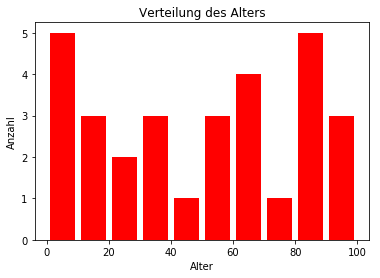

In [3]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters');

### Aufgaben
**A.** Erstelle ein Histogramm der Tweet-Längen der Troll-Accounts.  
**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  
**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  
**D. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

[Anfang](#top)

<a name="user_unterschied"></a>2. Wie unterscheiden sich die User?
---
Zur Vorbereitung dieses Teils laden wir die bereinigten DataFrames, die wir in Übung 05 erstellt haben:

In [4]:
# mit der Funktion "join()" können wir Pfade im Dateisystem sicher handhaben
from os.path import join

# die Bibliothek pandas liefert das DataFrame
import pandas as pd

tweets_normal = pd.read_csv(join('data','tweets_normal_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_trump = pd.read_csv(join('data','tweets_trump_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_troll = pd.read_csv(join('data','tweets_troll_bereinigt.csv'), encoding='ISO-8859-1', lineterminator='\n')
tweets_normal.head()

,Date,User,Tweet,tweet_length,word_number
0,2009-04-06 22:19:00,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,20
1,2009-04-06 22:19:00,scotthamilton,is upset that he can't update his Facebook by ...,111,22
2,2009-04-06 22:19:00,mattycus,@Kenichan I dived many times for the ball. Man...,89,19
3,2009-04-06 22:19:00,ElleCTF,my whole body feels itchy and like its on fire,47,11
4,2009-04-06 22:19:00,Karoli,"@nationwideclass no, it's not behaving at all....",111,22


**A.** Visualisiere die Länge der Tweets von normalen Usern, Trollen und Trump in einem Histogram. Wähle ```bins``` und ```range``` so, dass die in den Daten steckende Information deutlich wird. Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind? Achte auf Achsenbeschriftungen, Titel und Legende der Abbildung. <font color='green'>**HINWEIS:** Um die drei Datensätze vergleichbar zu machen, bietet sich das Argument ```density=True``` an. Du kannst einfach in der selben Code-Zelle mehrfach hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Alternativ kannst du der Funktion auch eine Liste von Listen als Argument mitgeben. Dann werden die Balken der verschiedenen Datensätze _nebeneinander_ statt übereinander dargestellt. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font>   

**B.** Was fällt dir an der Visualisierung auf? Verhalten sich die verschiedenen User (Gruppen) unterschiedlich? Was ist die mittlere Tweet-Länge für die normalen User, Trolle und Trump? Was der Median?   

**C.** Visualisiere nur die Tweets der normalen User in einem Histogram. Wähle die maximale Anzahl an Zeichen, die in einem Tweet erlaubt sind als Anzahl der Bins und setze ```range=[0,140]```. Visualisiere Mittelwert und Median als Linien in der Abbildung.

Linien in einer Abbildung lassen sich wie folgt zeichnen:

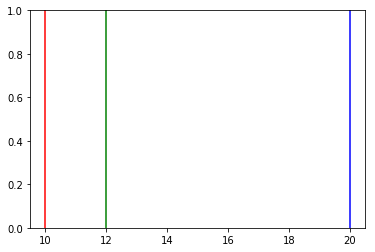

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.axvline(x=10, color='red')
plt.axvline(x=12, color='green')
plt.axvline(x=20, color='blue')

[Anfang](#top)

<a name="zeitreihen"></a>3. Zeitreihen
---
Um eine Zeitentwicklung in unserem Datensatz zu veranschaulichen, müssen wir dem Datensatz erst einmal Information über die Zeit entlocken. Dafür wandeln wir die Information zu Zeit und Datum in einen zeitlichen _Abstand_ zum ersten Post um. Wenn also der erste Post im Datensatz zur Stunde 0 erfolgt, dann hat ein Post der einen Tag und 5 Stunden später erfolg ist einen Abstand von 29 Stunden zum ersten Post. Um das zu bewerkstelligen, bedienen wir uns des Moduls ```datetime``` das uns ein ```datetime```-Objekt zur Verfügung stellt (siehe Lösung zu Übung 05 **3.D**). Dieses Objekt hat die Funktion ```strptime()```, der wir den String mit Datum und Uhrzeit sowie Information zur Formatierung des Strings übergeben können. Wir bekommen ein ```Datetime```-Objekt zurück, mit dem sich rechnen lässt. Das heißt, verschiedene ```datetime```-Objekte lassen sich voneinander abziehen oder addieren um Zeitabstände zu erhalten:

In [6]:
# zur Erinnerung: so sieht die aktuell gespeicherte Information
# zu Datum und Uhrzeit aus
print(tweets_trump['Date'].head())

0    2009-05-20 22:29:00
1    2010-11-29 15:52:00
2    2010-10-28 18:53:00
3    2010-11-24 17:20:00
4    2009-11-16 21:06:00
Name: Date, dtype: object


In [7]:
# importiere das datetime objekt aus dem modul datetime
from datetime import datetime

# das ist das Format des Strings mit der Zeitinformation, also
# Jahr-Monat-Tag Stunde:Minute:Sekunde
fmt = '%Y-%m-%d %H:%M:%S'

# wir verwandeln die Einträge der Spalte 'Date' in datetime-Objekte
tweets_trump['Date_new'] = [datetime.strptime(date, fmt) for date in tweets_trump['Date']]

In [8]:
# die Information sieht immer noch gleich aus
print(tweets_trump.loc[0]['Date_new'])

# aber jetzt können wir mit ihr rechnen!
print(tweets_trump.loc[1]['Date_new'] - tweets_trump.loc[0]['Date_new'])

2009-05-20 22:29:00
557 days 17:23:00


Wir fügen eine neue Spalte zum DataFrame hinzu, die den zeitlichen Abstand jedes Tweets zum frühesten Tweet enthält. Mit der Funktion ```total_seconds()``` konvertieren wir den Zeitabstand in die Anzahl der Sekunden.

In [9]:
# berechnen der Zeitabstände
zeitabstand = [(date - tweets_trump['Date_new'].min()).total_seconds() for date in tweets_trump['Date_new']]

# Hinzufügen der Spalte
tweets_trump['timedelta'] = zeitabstand

# bei genauerem Nachdenken stellt sich die Darstellung in Sekunden als
# nicht so praktikabel heraus, deswegen teilen wir noch einmal durch
# 60 (Sekunden) mal 60 (Minuten), um den Zeitabstand in Stunden anzugeben
tweets_trump['timedelta'] = tweets_trump['timedelta'] / (60*60)

In [10]:
# aktuell sind die Werte noch nicht sortiert
tweets_trump.head()

,Date,User,Tweet,Length,tweet_length,word_number,Date_new,timedelta
0,2009-05-20 22:29:00,realDonaldTrump,Read a great interview with Donald Trump that ...,112,112,16,2009-05-20 22:29:00,387.583333
1,2010-11-29 15:52:00,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,127,127,23,2010-11-29 15:52:00,13772.966667
2,2010-10-28 18:53:00,realDonaldTrump,I was on The View this morning. We talked abou...,139,139,23,2010-10-28 18:53:00,13007.983333
3,2010-11-24 17:20:00,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,140,140,23,2010-11-24 17:20:00,13654.433333
4,2009-11-16 21:06:00,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,116,116,14,2009-11-16 21:06:00,4706.200000


In [11]:
# deswegen sortieren wir die Tabelle anhand der Spalte "timedelta"
tweets_trump.sort_values('timedelta',inplace=True)

Mit der Funktion ```plot(x, y)``` der Bibliothek ```matplotlib.pyplot``` können wir ein Liniendiagram erstellen, indem wir der Funktion zwei Listen mit Werten auf der x- und y- Achse geben:

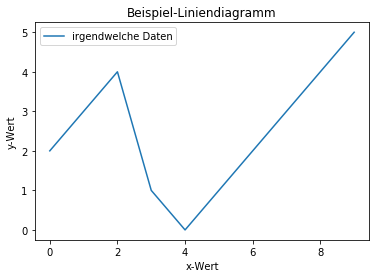

In [12]:
# importiere die Bibliothek mit dem Kürzel "plt"
import matplotlib.pyplot as plt
%matplotlib inline

# erstelle zwei Listen mit Datenpunkten für die 
# x-Achse und y-Achse
x = range(10)
y = [2,3,4,1,0,1,2,3,4,5]

# plotte das Liniendiagramm
plt.plot(x,y, label='irgendwelche Daten')

# Achsenbeschriftungen, Titel und Legende funktionieren
# genau gleich wie für Histogramme
plt.xlabel('x-Wert')
plt.ylabel('y-Wert')
plt.title('Beispiel-Liniendiagramm')
plt.legend()

### Aufgaben
**A.** Was ist das Datum und die Uhrzeit des frühesten und spätesten Tweets im Datensatz?  
**B.** Erstelle ein Liniendiagramm der Tweet-Länge über der Zeit. Vergiss dabei nicht die Achsenbeschriftungen etc. Wie entwickelt sich die Tweet-Länge in der Zeit bevor Trump seine Kandidatur bekannt gibt? Wie danach? Wie kannst du dir die plötzlichen Sprünge in der Tweet-Länge erklären?  
**C.** Mit den Funktionen ```plt.xlim(xmin, xmax)``` kannst du den Bereich auf der x-Achse einschränken, der im Diagramm angezeigt wird. Benutze diese Funktion, um dir kleinere Zeiträume genauer anzusehen.   

Um in dem Trump-Datensatz besser nach Jahren filtern zu können, fügen wir eine Spalte mit der Jahreszahl hinzu:

In [13]:
# das können wir so einfach tun, da die in der Spalte "Date" gespeicherten
# datetime-Objekte ein Attribut .year haben, das uns direkten Zugriff auf das
# Jahr gibt (ähnlich übrigens mit Monat und Tag).
tweets_trump['year'] = [date.year for date in tweets_trump['Date_new']]

**D.** Berechne für die einzelnen Jahre die Mittlere Tweet-Länge und die mittlere Anzahl der Worte pro Tweet. Visualisiere alle Größen über den Verlauf der Jahre. <font color='green'>**HINWEIS:** Den mittleren Zeitlichen Abstand zwischen Tweets musst du erst aus dem Datums- und Uhrzeitangaben berechnen. </font> Was siehst du und wie lässt sich die Abbildung interpretieren?  
**E.** Auch die Funktion ```plot()``` hat viele verschiedene Argumente, mit denen man ihr Verhalten modifizieren kann. Mache dich mit der Dokumentation der Funktion vertraut und probiere ein paar Argumente aus, um die Abbildung zu verändern. Versuche insbesondere, die Darstellung der Linie zu verändern: aktuell ist die Linie einfach nur eine Linie. Möglich sind aber auch Punkte oder Striche. Was eignet sich für unsere Daten am besten und warum?  
**F. (optional)** Rechne den zeitlichen Abstand zwischen den aufeinander folgenden Tweets aus und füge ihn als eine neuen Spalte zum DataFrame hinzu. Wieviele Tweets pro Stunde hat Trump über den gesamten betrachteten Zeitraum in etwa abgesetzt? Was ist der Median des Zeitabstandes? Wie interpretierst du die Diskrepanz zwischen Mittelwert und Median?  
**G. (optional)** Errechne den Mittelwert und Median des Zeitabstands zwischen den Tweets für jedes einzelne Jahr im Datensatz. Visualisiere den zeitlichen Verlauf des Mittelwerts und Medians über die Jahre in einem Liniendiagramm. Vergiss nicht auf Achsenbeschriftungen etc.  
**H. (optional)** Visualisiere die Zeitabstände in einem Histogram. Zeichne eine Linie bei 7 Stunden ein (wir nehmen einmal an, das ist in etwa die Zeit, die ein Mensch schläft). Kannst du aus der Visualisierung entnehmen, ob Donald Trump schläft?

[Anfang](#top)